In [2]:
import pandas as  pd 
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

# 1. EDA FOR DETECTING OUTLIERS

    Salary
0   200000
1   400000
2   500000
3   670000
4   430000
5   550000
6   430000
7   560000
8  1000000


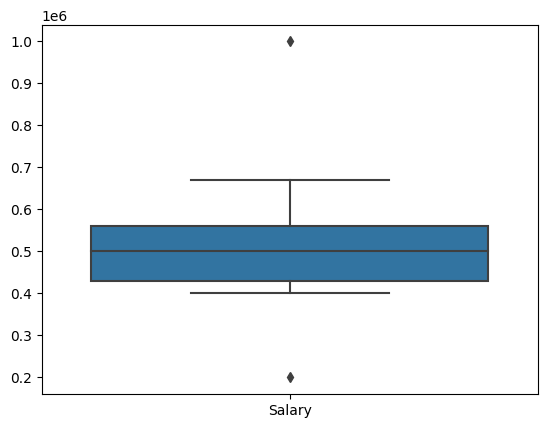

In [108]:
data = {    'Salary': [200000, 400000, 500000, 670000, 430000, 550000, 430000, 560000, 1000000]

       }

salary = pd.DataFrame(data)
print(salary)


sns.boxplot(salary)
plt.show()

## as you can see the above boxplot has two  diamond shape at the bottom and the upper which is the OUTLIERS 

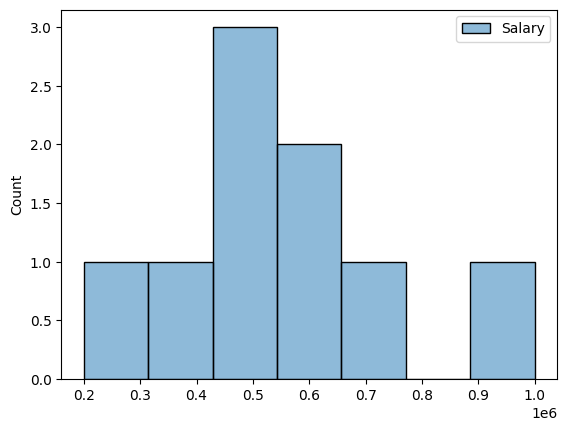

In [98]:
sns.histplot(salary)
plt.show()

## the histogram above us has a space after  0.7 and 0.8 the box in 0.9 and 1.0 is the OUTLIERS


# ---------------------------------------------------------------------------------------------------------------

# 2 . STATISTICAL WAYS TO FIND OUTLIERS

###  The IQR is a measure of the range of values within the middle 50% of the dataset. It is obtained by subtracting the 25th percentile (Q1) from the 75th percentile (Q3). In this case, the IQR of 130,000.0 indicates that the middle 50% of the salaries in the dataset spans a range of 130,000.0 units.

### The IQR is commonly used to identify and analyze the variability or dispersion of data points. It is less affected by extreme values (outliers) than the range, making it a robust measure of spread. A larger IQR suggests a wider dispersion of values, while a smaller IQR indicates a narrower concentration of values around the median.

In [106]:
import pandas as pd

data = {
   'Salary': [200000, 400000, 500000, 670000, 430000, 550000, 430000, 560000, 10000000]
}

salary = pd.DataFrame(data)

q1 = salary['Salary'].quantile(0.25)
q3 = salary['Salary'].quantile(0.75)

iqr = q3 - q1
print('The Interquartile Range (IQR) is', iqr)


The Interquartile Range (IQR) is 130000.0


### the Interquartile Range (IQR) is commonly used as a tool to identify potential outliers in a dataset. Outliers are data points that significantly deviate from the rest of the data.

### One common approach to identify outliers is by using the concept of the "fences" in relation to the IQR. The lower fence is calculated as Q1 - (1.5 * IQR), and the upper fence is calculated as Q3 + (1.5 * IQR). Data points that fall below the lower fence or above the upper fence are considered potential outliers.

In [100]:
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)

In [101]:
print('anything below this number ',lower_fence, 'is an outlier') 
print('anything above this number ',upper_fence ,'is an outlier')

anything below this number  235000.0 is an outlier
anything above this number  755000.0 is an outlier


In [102]:
# now pass a condition that prints those number which are lower than lower_fence and more than  upper_fence
outliers = salary[(salary['Salary'] < lower_fence) | (salary['Salary'] > upper_fence)]

print('these two numbers are Outliers:')
print(outliers)


these two numbers are Outliers:
    Salary
0   200000
8  1000000


# Z-Score or Standard Deviation: 

### The z-score method is a common approach to detect outliers based on their deviation from the mean in terms of standard deviations. Here's how it works:

### Calculate the z-score for each data point: The z-score is calculated by subtracting the mean of the dataset from each data point and then dividing it by the standard deviation. The formula for calculating the z-score is:
### z = (x - mean) / standard deviation

### Define a threshold: Typically, a z-score threshold of 2 or 3 is used to identify outliers. If a data point has a z-score greater than the threshold (e.g., z > 3) or less than the negative threshold (e.g., z < -3), it is considered an outlier.

### Identify the outliers: Data points that exceed the defined threshold are flagged as outliers

In [103]:
# Calculate z-score for each data point
z_scores = np.abs((salary['Salary'] - salary['Salary'].mean()) / salary['Salary'].std())

# Define the threshold (e.g., z > 3)
threshold = 3

# Identify outliers
outliers = salary[z_scores > threshold]

print('Outliers:')
print(outliers)

Outliers:
Empty DataFrame
Columns: [Salary]
Index: []


### according to z - score there is no outliers 

## what techniques you used ultimately depends on what kind of dataset you are working with and what are you trying to achieve

# ---------------------------------------------------------------------------------------------------------------

# 3 . HOW TO DEAL WITH THE OUTLIERS 

### Remove outliers: In some cases, it may be appropriate to remove outliers from the dataset. However, this should be done with caution, as removing outliers can affect the overall distribution and potentially bias the analysis.

In [104]:
# we again find teh outlers using Iqr and then use the same condition and then remove those that are outleirs
salary_no_outliers = salary[(salary['Salary'] >= lower_fence) & (salary['Salary'] <= upper_fence)]

print('Original Salary Data:')
print(salary)

print('\nSalary Data without Outliers:')
print(salary_no_outliers)

Original Salary Data:
    Salary
0   200000
1   400000
2   500000
3   670000
4   430000
5   550000
6   430000
7   560000
8  1000000

Salary Data without Outliers:
   Salary
1  400000
2  500000
3  670000
4  430000
5  550000
6  430000
7  560000


### as you can see we have removed any outliers using the condition 

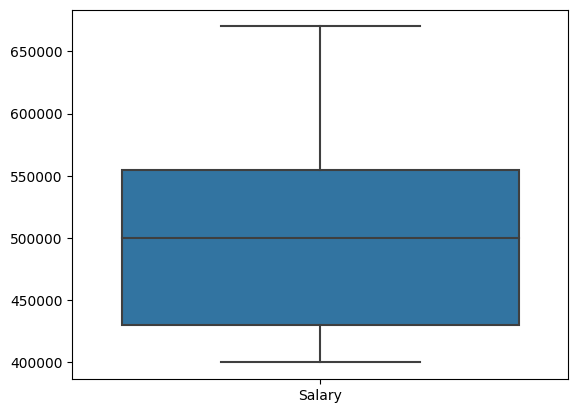

In [105]:
sns.boxplot(salary_no_outliers)
plt.show()

## hmmm no more diamond shape 

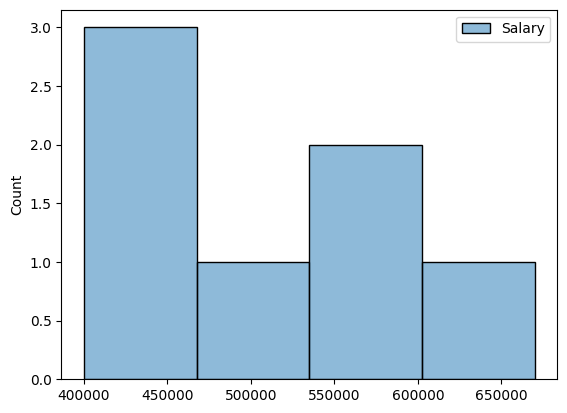

In [75]:
sns.histplot(salary_no_outliers)
plt.show()

## Capping or Flooring: Similar to Winsorization, capping or flooring involves setting a predefined upper or lower limit for outliers. Values above the upper limit or below the lower limit are replaced with the respective limit.

In [113]:
data = {'Salary': [200000, 400000, 500000, 670000, 430000, 550000, 430000, 560000, 1000000]}
salary = pd.DataFrame(data)

# Calculate the IQR
Q1 = salary['Salary'].quantile(0.25)
Q3 = salary['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
salary_no_outliers = salary[(salary['Salary'] >= lower_bound) & (salary['Salary'] <= upper_bound)]

print('Dataset without outliers:')
print(salary_no_outliers)


Dataset without outliers:
   Salary
1  400000
2  500000
3  670000
4  430000
5  550000
6  430000
7  560000


# CAPPING HELPS A LOT  
# I USE CAPPING MORE OFTEN 

# ---------------------------------------------------------------------------------------------------------------

In [116]:
import statsmodels.api as sm

data = {'Salary': [200000, 400000, 500000, 670000, 430000, 550000, 430000, 560000, 1000000]}
salary = pd.DataFrame(data)

# Robust regression
X = sm.add_constant(salary.index)  # Adding a constant term for the intercept
model = sm.RLM(salary, X, M=sm.robust.norms.HuberT())  # Using Huber's T estimator
robust_results = model.fit()

# Robust estimators of location and scale
median_salary = salary['Salary'].median()
mad_salary = sm.robust.scale.mad(salary['Salary'])

print('Robust Regression Results:')
print(robust_results.summary())

print('\nRobust Estimators of Location and Scale:')
print('Median Salary:', median_salary)
print('Median Absolute Deviation (MAD):', mad_salary)


Robust Regression Results:
                    Robust linear Model Regression Results                    
Dep. Variable:                 Salary   No. Observations:                    9
Model:                            RLM   Df Residuals:                        7
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 27 May 2023                                         
Time:                        20:30:53                                         
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.058e+05   1

## The robust linear model regression results show the coefficients, standard errors, z-scores, and p-values for the intercept (const) and the independent variable (x1). The coefficient for the intercept is approximately 305,800, and the coefficient for x1 is approximately 54,040. The p-values indicate the statistical significance of the coefficients.

## obust Estimators of Location and Scale:
## The median salary is calculated to be 500,000.0, which represents the robust estimator of location. The Median Absolute Deviation (MAD) is approximately 103,782.16, which represents the robust estimator of scale.

## These robust estimators provide more reliable estimates of the location and scale of the salary data, as they are less sensitive to outliers compared to traditional estimators such as the mean and standard deviation.

# ---------------------------------------------------------------------------------------------------------------

## Transform the data: Instead of removing outliers, you can apply data transformations to reduce the impact of outliers. For example, you can use logarithmic, square root, or Box-Cox transformations to make the data more symmetric and reduce the influence of extreme values.

In [77]:
from scipy import stats

# Logarithmic transformation
salary['Log_Salary'] = np.log(salary['Salary'])

# Square root transformation
salary['Sqrt_Salary'] = np.sqrt(salary['Salary'])

# Box-Cox transformation
salary['BoxCox_Salary'], _ = stats.boxcox(salary['Salary'])

print('Original Salary Data:')
print(salary[['Salary']])

print('\nLogarithmic Transformed Salary Data:')
print(salary[['Log_Salary']])

print('\nSquare Root Transformed Salary Data:')
print(salary[['Sqrt_Salary']])

print('\nBox-Cox Transformed Salary Data:')
print(salary[['BoxCox_Salary']])

Original Salary Data:
    Salary
0   200000
1   400000
2   500000
3   670000
4   430000
5   550000
6   430000
7   560000
8  1000000

Logarithmic Transformed Salary Data:
   Log_Salary
0   12.206073
1   12.899220
2   13.122363
3   13.415033
4   12.971540
5   13.217674
6   12.971540
7   13.235692
8   13.815511

Square Root Transformed Salary Data:
   Sqrt_Salary
0   447.213595
1   632.455532
2   707.106781
3   818.535277
4   655.743852
5   741.619849
6   655.743852
7   748.331477
8  1000.000000

Box-Cox Transformed Salary Data:
   BoxCox_Salary
0     198.271311
1     253.156807
2     273.835850
3     303.510801
4     259.683766
5     283.169821
6     259.683766
7     284.969490
8     349.340370


### In this code, the NumPy library is used to perform logarithmic (np.log()) and square root (np.sqrt()) transformations on the Salary column of the salary DataFrame. These transformations are applied by creating new columns (Log_Salary and Sqrt_Salary) that store the transformed values.

### For the Box-Cox transformation, the boxcox() function from the SciPy library is used. The transformed values are stored in the BoxCox_Salary column. The function also returns an optimal lambda value, but it is ignored in this example.

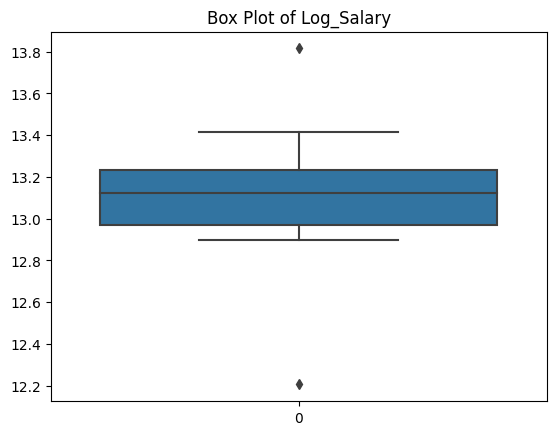

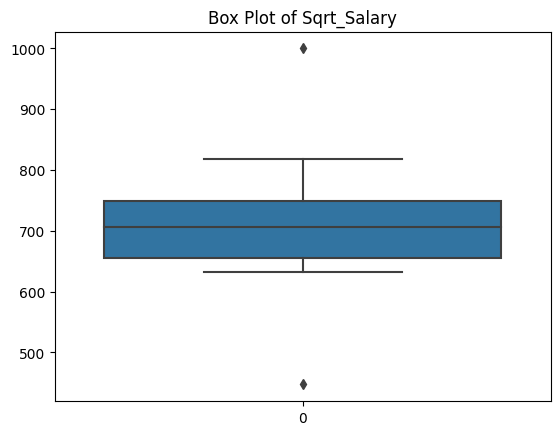

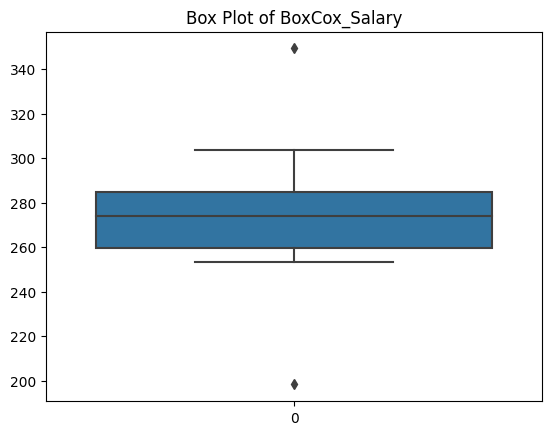

In [82]:
transformed_columns = ['Log_Salary', 'Sqrt_Salary', 'BoxCox_Salary']

# Plot box plots for each transformed column
for column in transformed_columns:
    sns.boxplot(data=salary[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

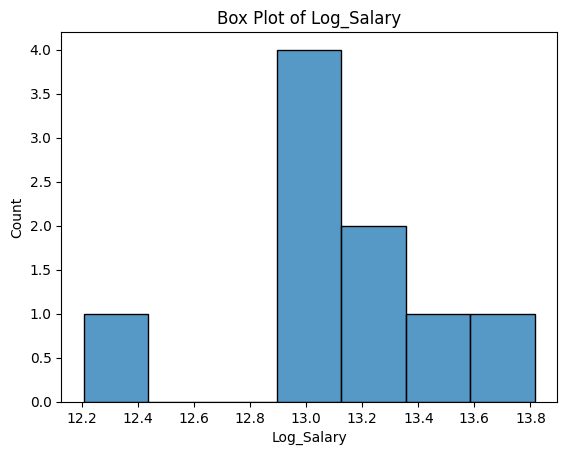

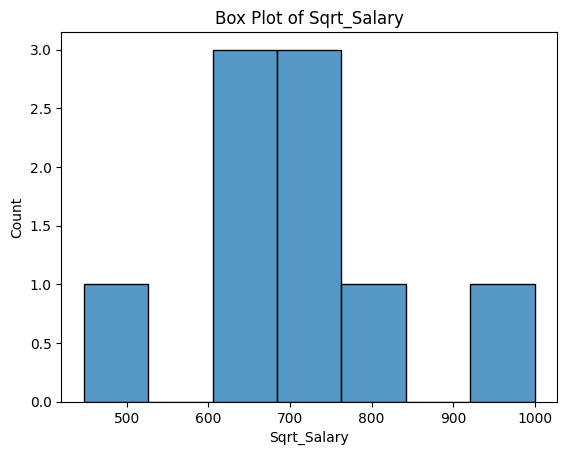

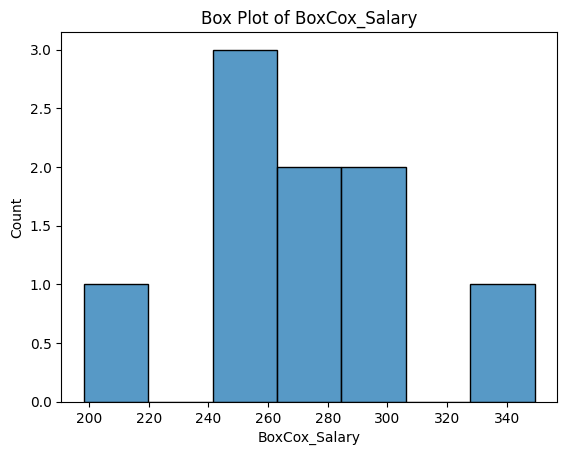

In [83]:
transformed_columns = ['Log_Salary', 'Sqrt_Salary', 'BoxCox_Salary']

# Plot box plots for each transformed column
for column in transformed_columns:
    sns.histplot(data=salary[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


## sometimes these transformation may not work so you need to be careful
## transformation are usually used if there are many  outliers in a column and you cannot drop all the rows 

# ---------------------------------------------------------------------------------------------------------------

# CONCLUSION 

## * TRY VISUALISING YOUR DATA FIRST
## * THEN TRY USING STATISTICAL METHODS 
## * TRY DROPPING THE OUTLIERS IF THEY ARE LESS , IF THERE ARE MANY OUTLIERS YOU MAY NEED TO DO SOME TRANSFORMATION 
